<a href="https://colab.research.google.com/github/Sezo-code/Michine-Learning/blob/main/Titanic_Data_Project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
# Assign the result of pd.read_csv to the variable df
df = pd.read_csv(r"/content/Titanic-Dataset.csv")

# Now you can use df to access the DataFrame
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
df.shape

(891, 12)

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# ANALYSE THE DATA

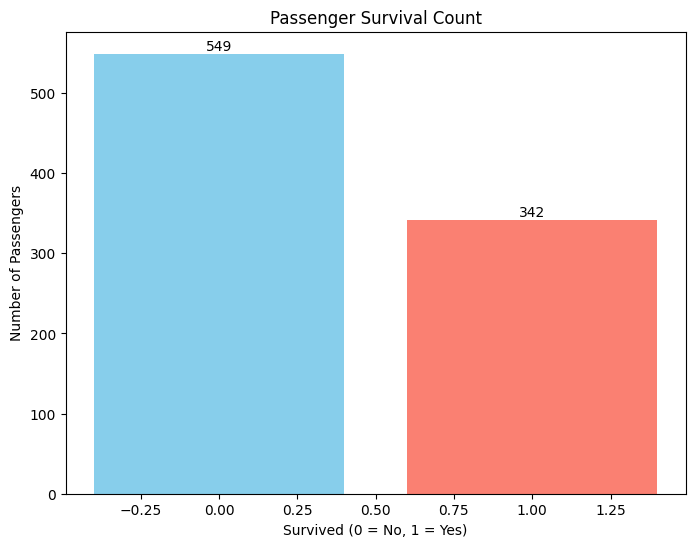

In [13]:
# prompt: CALCULATE THE PERSANGEERS WHO SURVIVE OR NOT SURVIVE AND PLOT CHANGE COLORS DATA LABEL IN THE GRAPH

import matplotlib.pyplot as plt
# Calculate the number of passengers who survived and did not survive
survived_counts = df['Survived'].value_counts()

# Create the bar plot with different colors and data labels
plt.figure(figsize=(8, 6))
bars = plt.bar(survived_counts.index, survived_counts.values, color=['skyblue', 'salmon'])  # Different colors for survived/not survived

plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.title("Passenger Survival Count")

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()


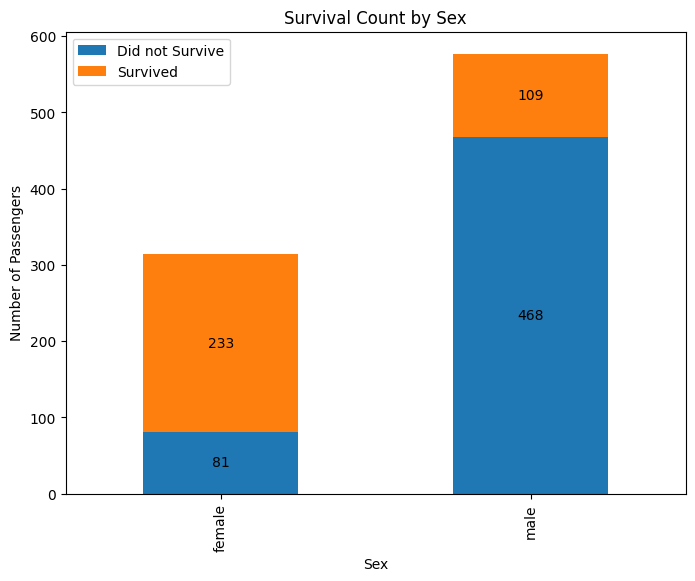

In [14]:
# prompt: HOW MANY FEMALES nd how many males survive plot label

import matplotlib.pyplot as plt
# Group data by sex and survival status
survival_by_sex = df.groupby(['Sex', 'Survived'])['Survived'].count().unstack()

# Create the plot
survival_by_sex.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add labels and title
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.title("Survival Count by Sex")
plt.legend(["Did not Survive", "Survived"])

# Annotate bars with counts (optional)
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()


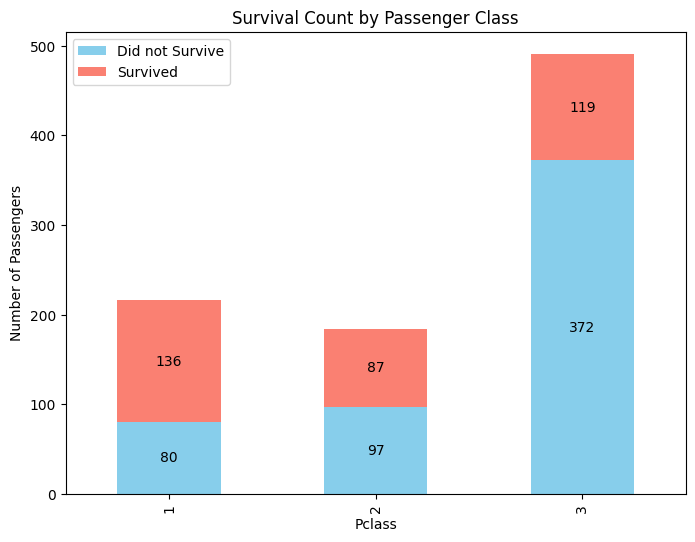

In [15]:
# Group data by Pclass and Survived
survival_by_class = df.groupby(['Pclass', 'Survived'])['Survived'].count().unstack()

# Create the plot with different colors for each class
survival_by_class.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon', 'lightgreen'])

# Add labels and title
plt.xlabel("Pclass")
plt.ylabel("Number of Passengers")
plt.title("Survival Count by Passenger Class")
plt.legend(["Did not Survive", "Survived"])

# Annotate bars with counts
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()


<ipython-input-16-45b72edb27eb>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby(['AgeGroup', 'Survived'])['Survived'].count().unstack()


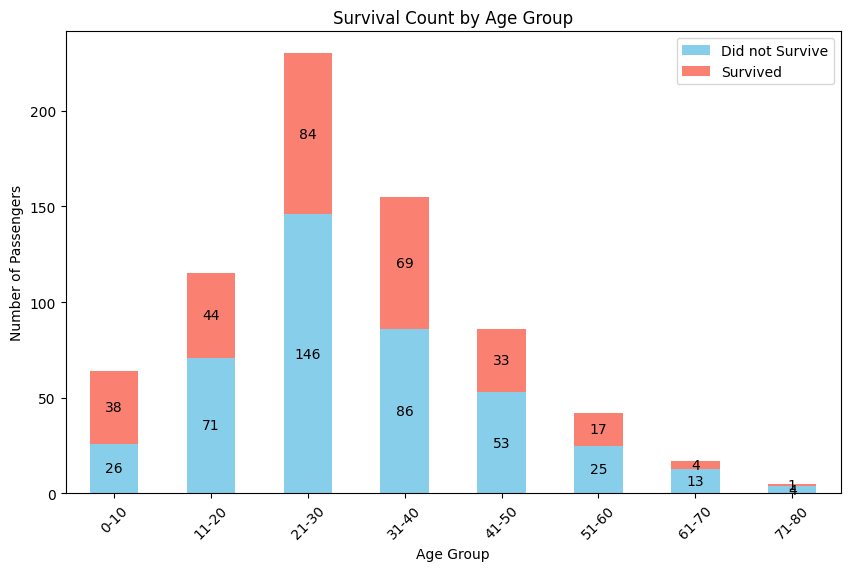

In [16]:
# Create a new column 'AgeGroup' based on age ranges
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Group data by AgeGroup and Survived
survival_by_age = df.groupby(['AgeGroup', 'Survived'])['Survived'].count().unstack()

# Create the plot with different colors
survival_by_age.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.title("Survival Count by Age Group")
plt.legend(["Did not Survive", "Survived"])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Annotate bars with counts
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()


**clean the Data**

In [18]:
# prompt: count null for each column

df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [19]:
# prompt: DROP A COLUMN Cabin

# Drop the 'Cabin' column
df = df.drop('Cabin', axis=1)


In [20]:
# Drop rows with any NaN values
df = df.dropna()

# Now you can use df to access the DataFrame
df.head(10)
df.shape
df.describe()
# # ANALYSE THE DATA

# Calculate the number of passengers who survived and did not survive
survived_counts = df['Survived'].value_counts()

# ... (rest of your code)


In [21]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,31-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,31-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,31-40


In [22]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
# prompt: if sex is male say 1 else say 0 and also do for     Embarked

# Convert 'Sex' to numerical values (1 for male, 0 for female)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# Convert 'Embarked' to numerical values
# Assuming you want to handle missing values by assigning a new category
# You can choose another strategy based on your data analysis needs

embarked_mapping = {'S': 0, 'C': 1, 'Q': 2} # Example mapping

# Fill NaN values in 'Embarked' with a placeholder (e.g., -1) or a more suitable value
df['Embarked'].fillna(-1, inplace=True)
# Map to numerical values
df['Embarked'] = df['Embarked'].map(embarked_mapping).fillna(-1).astype(int)

df.head(5)


<ipython-input-24-27466899bc82>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(-1, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,-1,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,-1,31-40
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,-1,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,-1,31-40
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,-1,31-40


In [25]:
# prompt: remove column sex

# Assuming 'df' is your DataFrame from the previous code

# Drop the 'Sex' column
df = df.drop('Sex', axis=1)

# Now display the updated DataFrame to verify
df.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,-1,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,-1,31-40
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,-1,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,-1,31-40
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,-1,31-40


In [26]:
# Define features (X) and target variable (y)
# Drop columns that are not numerical or that you don't want to include in the model
X = df.drop(['Survived', 'Name', 'Ticket', 'Embarked', 'AgeGroup'], axis=1)  # Exclude non-numeric and irrelevant columns
y = df['Survived']  # Target variable ('Survived')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,21-30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,31-40,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,21-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,31-40,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,31-40,1


In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [28]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy}")

Accuracy of Logistic Regression: 0.6783216783216783
